In [69]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [71]:
iphone13_reviews

['\nOverall excellent product\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nOpen box diye sim tool nahi aa ya but phone mast aaya\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nOpen box diye sim tool nahi aa ya but phone mast aaya\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n',
 '\nOverall excellent product\n',
 '\nOffline Peksha best deal Only Amazon\n',
 '\nExpensive\n',
 '\nOpen box diye sim tool nahi aa ya but phone mast aaya\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n',
 '\nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android wi

In [72]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [73]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [74]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'overall', 'excellent', 'product', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'open', 'box', 'diye', 'sim', 'tool', 'nahi', 'aa', 'ya', 'but', 'phone', 'mast', 'aaya', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'open', 'box', 'diye', 'sim', 'tool', 'nahi', 'aa', 'ya', 'but', 'phone', 'mast', 'aaya', 'the', 'media', 'could', 'not', 'be', 'loaded', 'overall', 'excellent', 'product', 'offline', 'peksha', 'best', 'deal', 'only', 'amazon', 'expensive', 'open', 'box', 'diye', 'sim', 'tool', 'nahi', 'aa', 'ya', 'but', 'phone', 'mast', 'aaya', 'the', 'media', 'could', 'not', 'be', 'loaded', 'switched', 'from', 'android', 'to', 'iphone', 'here', 'are', 'my', 'pros', 'and', 'cons', '

In [76]:
from spacy.cli import download

download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [77]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone13_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [78]:
with open("D:\\Gurumurthy Assignments\\test mining\\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [79]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

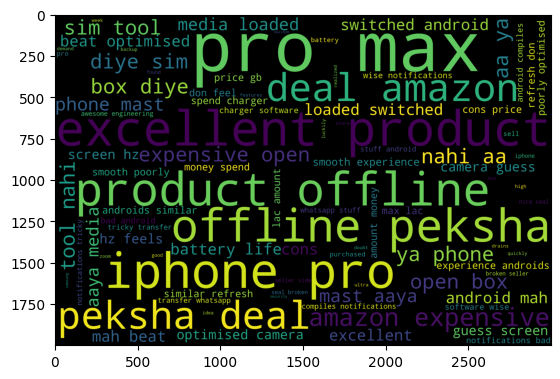

In [80]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [81]:
# positive words # Choose the path for +ve words stored in system
with open("D:\\Gurumurthy Assignments\\test mining\\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [82]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

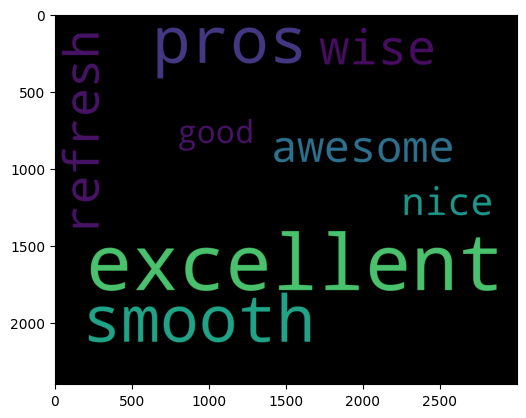

In [83]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [84]:
# negative words  Choose path for -ve words stored in system
with open("D:\\Gurumurthy Assignments\\test mining\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [85]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

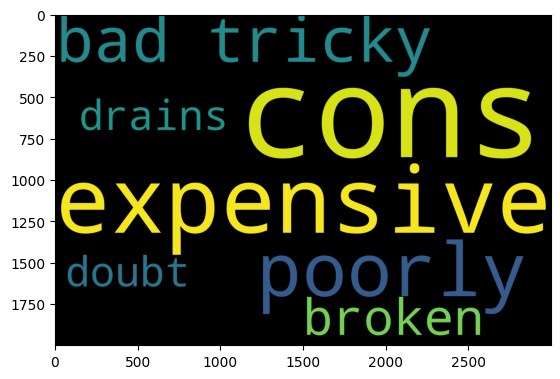

In [86]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)